## Prediction of the Titanic Survival Rate

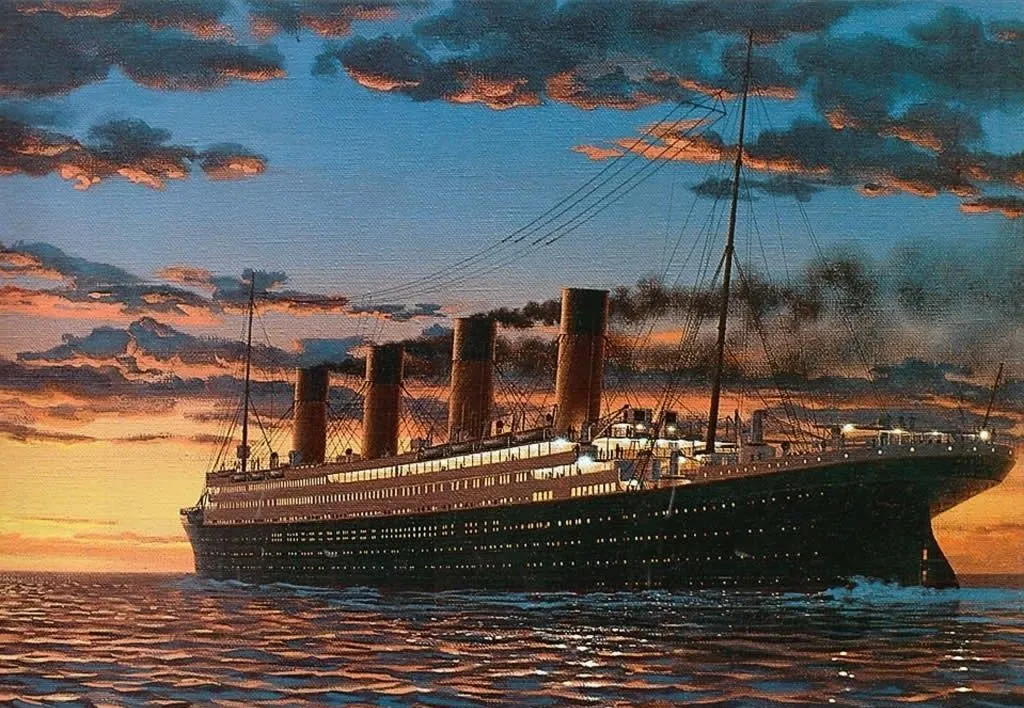

In [349]:
from IPython.display import Image

Image(filename='C:/Users/gaura/Downloads/Pictures/Saved Pictures/titanic-pictures.jpg', width=1000)


In [281]:
# start the Titanic survival prediction project.
# first import the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [282]:
df= pd.read_csv("D:/D.Desktop/notes 1965/notes 1965/DataSet/titanic.csv")

In [283]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
df.shape


(891, 12)

In [285]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [286]:
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [287]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [288]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [289]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [290]:
df['Embarked'].fillna('S',inplace=True)

In [291]:
df_age =np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean() + df['Age'].std(),177)
df_age


array([22, 43, 36, 27, 34, 18, 32, 16, 21, 17, 22, 16, 29, 28, 22, 26, 33,
       17, 18, 18, 25, 24, 42, 19, 33, 43, 33, 18, 27, 37, 20, 29, 27, 25,
       22, 17, 32, 15, 33, 39, 42, 38, 19, 16, 33, 40, 33, 16, 43, 21, 17,
       27, 22, 29, 40, 34, 35, 19, 21, 17, 28, 20, 22, 22, 37, 22, 29, 43,
       16, 37, 35, 17, 25, 37, 37, 19, 42, 31, 16, 27, 23, 36, 21, 28, 39,
       17, 42, 22, 27, 40, 37, 33, 43, 43, 15, 22, 42, 36, 17, 43, 26, 36,
       32, 20, 25, 39, 24, 40, 21, 37, 25, 24, 15, 36, 19, 29, 21, 30, 29,
       19, 28, 41, 16, 34, 27, 36, 23, 37, 35, 24, 18, 32, 21, 32, 16, 40,
       16, 34, 15, 16, 23, 16, 33, 20, 15, 35, 43, 29, 35, 23, 19, 21, 33,
       26, 33, 34, 40, 41, 35, 27, 18, 33, 31, 28, 31, 39, 16, 20, 32, 28,
       16, 23, 24, 22, 15, 43, 20])

In [292]:
# Mapping
df['Age'][ df['Age'].isnull()]=df_age

C:\Users\gaura\AppData\Local\Temp\ipykernel_2032\90790788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'][ df['Age'].isnull()]=df_age


In [293]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [294]:
df.drop('Cabin', axis=1, inplace=True)


In [295]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [296]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [297]:
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [298]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [299]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [300]:
df.drop('PassengerId', axis=1, inplace=True)

In [301]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

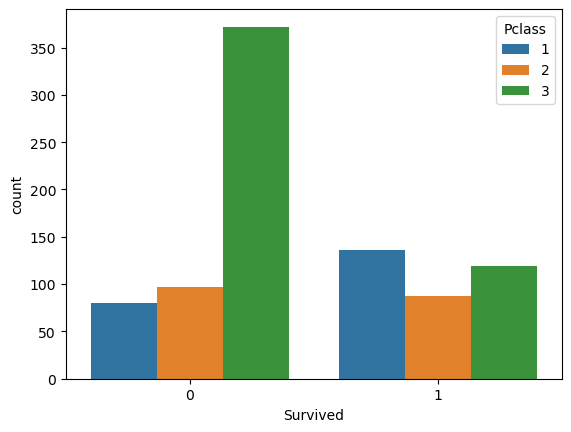

In [302]:
# visualize the count of survival wrt to Pclass
import seaborn as sns
sns.countplot(x=df['Survived'], hue= df['Pclass'])

In [303]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

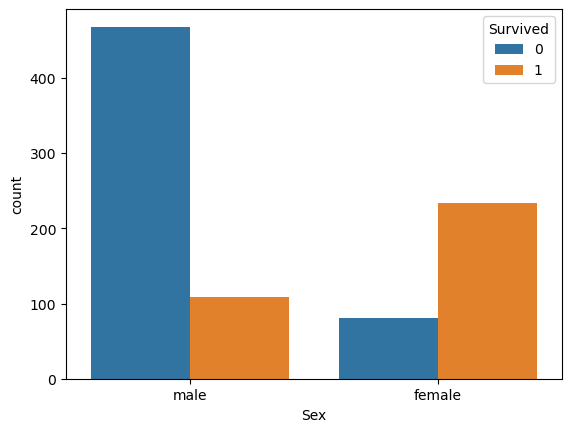

In [304]:
# visualize the count of survival wrt to Gender
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [305]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [306]:
df.drop(columns=['Ticket'],inplace=True)

In [307]:
df['Family']=df['SibSp']+df['Parch']+1

In [308]:
df['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [309]:
df.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [310]:
def cal(num):
    if num==1:
        return "Alone"
    elif num>1 and num<5:
        return "Medium"
    else:
        return "Large"

In [311]:
df['Family-Size'] = df['Family'].apply(cal)

In [312]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family-Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [313]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family-Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [314]:
df.drop(columns=['Name'],inplace=True)

In [315]:
df.shape

(891, 10)

In [316]:
df.shape

(891, 10)

<Axes: xlabel='Sex', ylabel='count'>

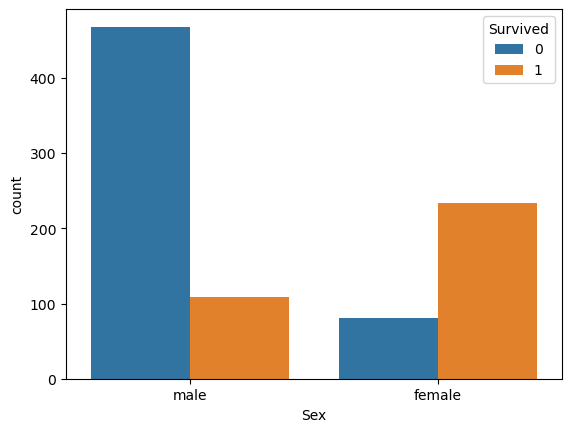

In [317]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

C:\Users\gaura\AppData\Local\Temp\ipykernel_2032\2506335343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


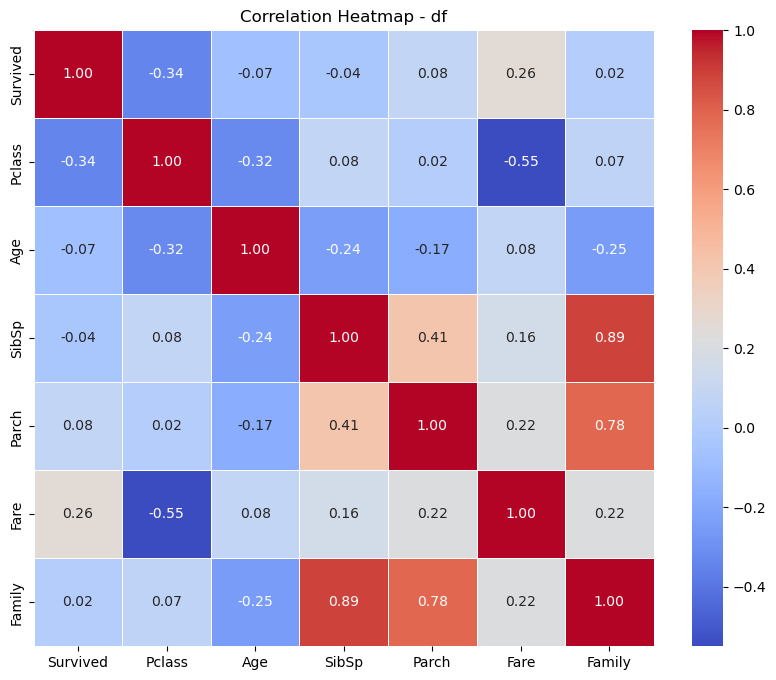

In [318]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap - df")
plt.show()

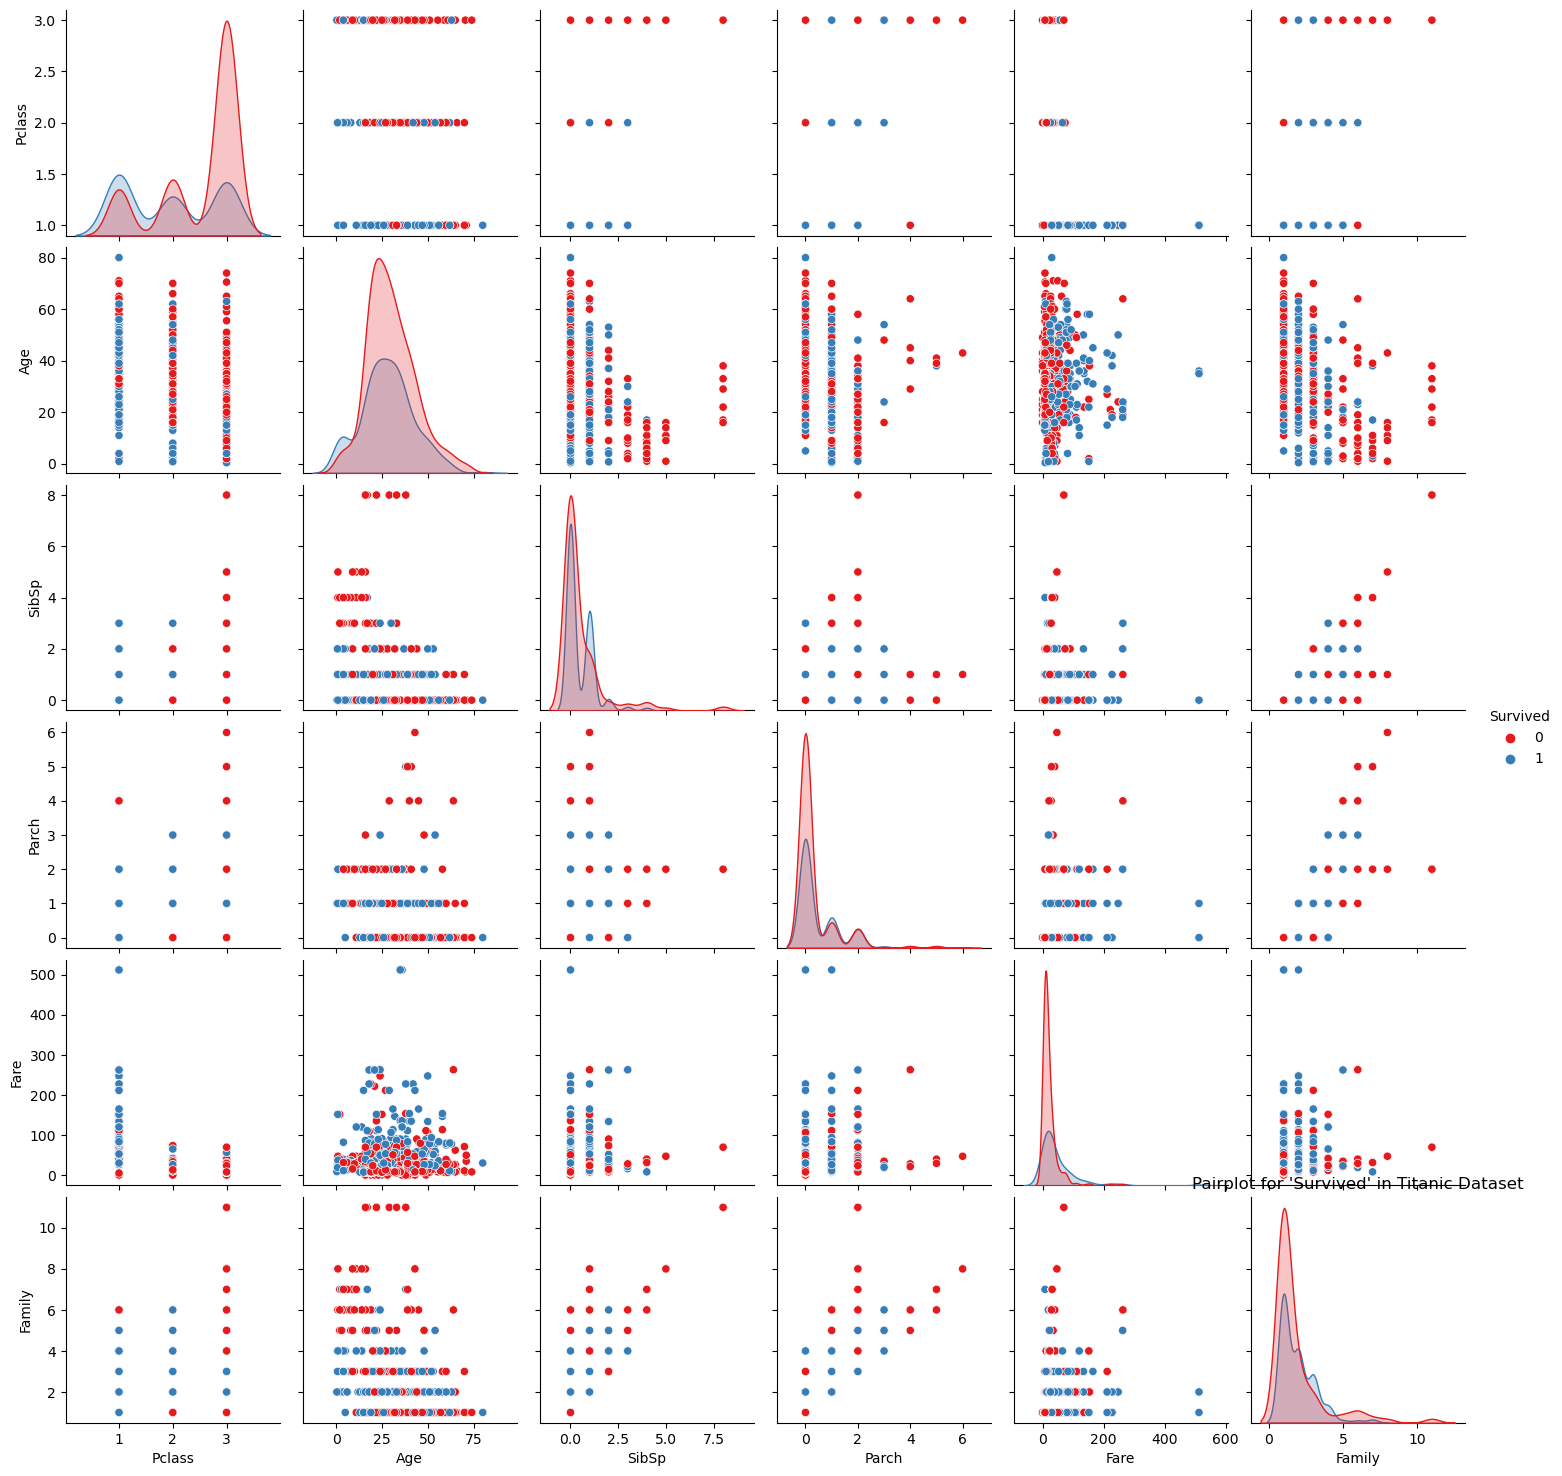

In [319]:
sns.pairplot(df, hue='Survived', palette='Set1')
plt.title("Pairplot for 'Survived' in Titanic Dataset")
plt.show()

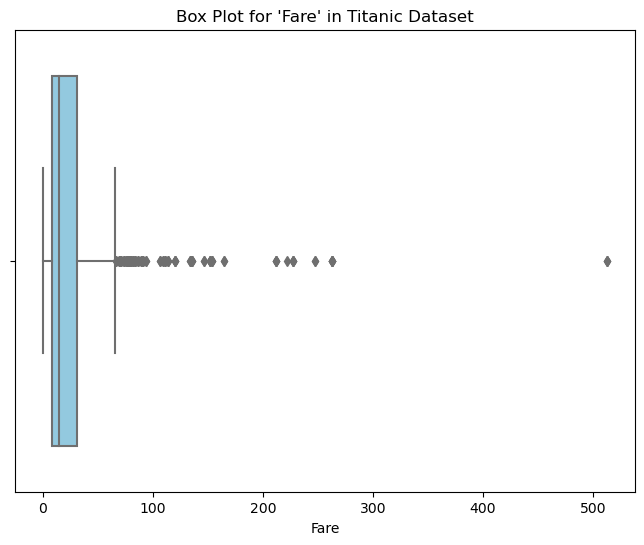

In [320]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=df, color='skyblue')
plt.title("Box Plot for 'Fare' in Titanic Dataset")
plt.show()

In [321]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Display the shape of the original and modified DataFrames
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (891, 10)
DataFrame shape after removing outliers: (775, 10)


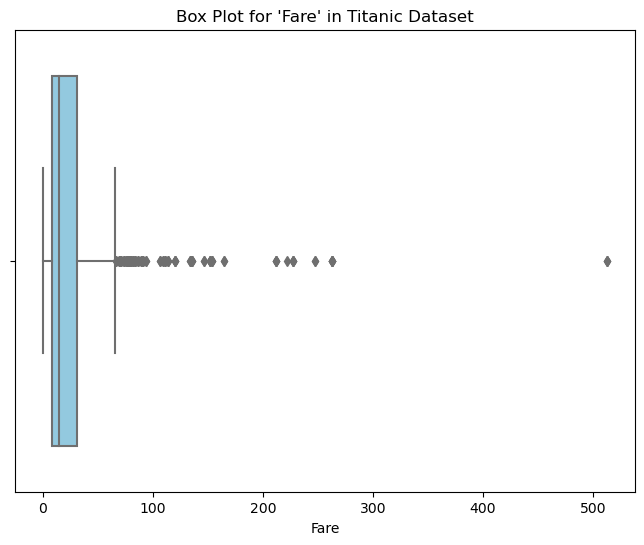

In [322]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=df, color='skyblue')
plt.title("Box Plot for 'Fare' in Titanic Dataset")
plt.show()

In [323]:
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Family-Size'],drop_first=True)

In [324]:
x= df.drop('Survived',axis=1)
y = df['Survived']
print(x.shape)
print(y.shape)

(891, 12)
(891,)


In [325]:
from sklearn.model_selection import train_test_split

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 12)
(623,)
(268, 12)
(268,)


In [330]:
from sklearn.linear_model import LogisticRegression

In [331]:
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [332]:
y_pred = log_model.predict(x_test)

In [333]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8171641791044776


In [336]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [337]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[139  18]
 [ 31  80]]


In [338]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       157
           1       0.82      0.72      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [342]:
class_report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision for the positive class (label 1)
precision_survived = class_report['1']['precision']

# Set a threshold for precision to decide whether to label as "Survived" or "Sorry not Survived"
threshold = 0.7  # Adjust this threshold as needed

# Make decisions based on precision
decisions = np.where(precision_survived >= threshold, 'Survived', 'Sorry not Survived')

# Display decisions
print("Decision based on precision for the positive class:")
print(decisions)

Decision based on precision for the positive class:
Survived


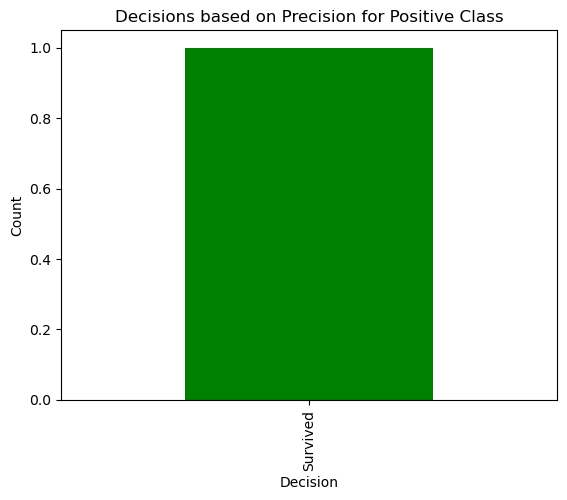

In [343]:
decision_counts = pd.Series(decisions).value_counts()

# Plot the bar chart
decision_counts.plot(kind='bar', color=['green', 'red'])
plt.title("Decisions based on Precision for Positive Class")
plt.xlabel("Decision")
plt.ylabel("Count")
plt.show()